In [1]:
import grpc
# import the generated classes
import service.model.style_transfer_rpc_pb2_grpc as style_transfer_rpc_pb2_grpc
import service.model.style_transfer_rpc_pb2 as style_transfer_rpc_pb2
from service import registry
from service.style_transfer import style_transfer_model as st

In [17]:
endpoint = input('Endpoint (localhost:{}): '.format(registry['style_transfer_service']['grpc']))
if endpoint == '':
    endpoint = 'localhost:{}'.format(registry['style_transfer_service']['grpc'])

# Open a gRPC channel
channel = grpc.insecure_channel('{}'.format(endpoint))

grpc_method = 'transfer_style'
#content_path = input('Content image path: ')
#style_path = input('Style image path: ')
content_path = './images/Ramon_Duraes.jpg'
style_path = 'https://cdn.shopify.com/s/files/1/2381/6607/products/Artistic_Lion_800x.jpg'

# create a stub (client)
stub = style_transfer_rpc_pb2_grpc.StyleTransferStub(channel)
# create a valid request message
input_info = style_transfer_rpc_pb2.input_info(content_path = content_path,                                optimization_iterations = 10)

Endpoint (localhost:7022):  


In [18]:
# make the call
response = stub.transfer_style(input_info)

In [19]:
img = st.base64_to_img(response.data.encode("utf8"), response.size)

In [20]:
%matplotlib inline

Loaded VGG model.


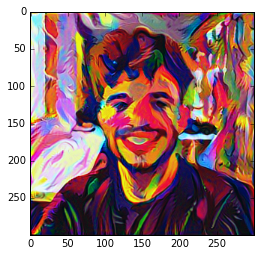

In [21]:
st().print_image(img)

Loaded VGG model.


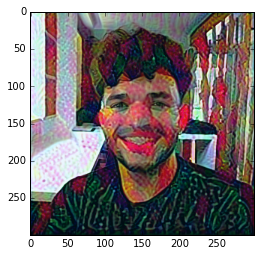

In [16]:
st().print_image(img)

In [6]:
response.data.encode("utf8").__class__

bytes

In [8]:
response.size

300